## Problem Statment

> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 

> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

In [5]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [6]:
from urllib.request import urlretrieve

In [7]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x215cbfaf2b0>)

In [117]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [201]:
medical_df = pd.read_csv('medical.csv')

In [202]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [15]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [18]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

# Exploratory Analysis and Visualization
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

#### Age¶
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [21]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [29]:
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

#### BMI
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [30]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [31]:

fig = px.histogram(medical_df,x='bmi',marginal='box',
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

#### Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [42]:

fig = px.histogram(medical_df,x='charges',marginal='box',color='smoker',
                   color_discrete_sequence=['green','grey'], 
                   title='Annual Medical Charges with respect to smokers')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under 10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300, the median for smokers is close to 35,000

In [53]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='sex', 
                   title='Annual Medical Charges with respect to gender')
fig.update_layout(bargap=0.1)
fig.show()

In [54]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='region',
                   title='Annual Medical Charges with respect to region')
fig.update_layout(bargap=0.1)
fig.show()

In both the cases it seems the distrubtion of charges is normal, although there is spread of females is longer than male and also in the southeast region compared to others.

Smoker
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [55]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [57]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')


It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?

In [58]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [59]:
medical_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

this tells us that in case of gender and region data there are almost equal distribution of data.

#### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [64]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
 
The Above chart depicts that the chareges has an effected if the person is smoker that means if a person is more likely to be smoker there is a high chance that the medical expenses will increase. 


#### BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [66]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [91]:
fig = px.violin(medical_df, y="charges", x="smoker", color="children", box=True, points="all",
          hover_data=medical_df.columns)
fig.show()

#### Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [88]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [89]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

This tells us that smokers have a high correlation with charges
so we are using a heatmap for seeing the better correlations.

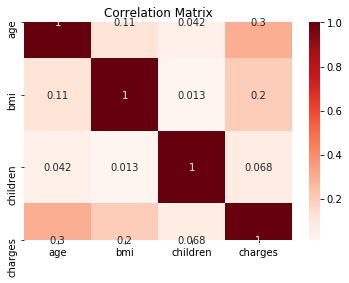

In [103]:
ax = sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');


### Linear Regression using Scikit-learn
In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.
Let's use the LinearRegression class from scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [111]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [112]:
model = LinearRegression()

In [ ]:
Next, we can use the fit method of the model to find the best fit line for the inputs and targets.

In [114]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


Let's fit the model to the data.

In [115]:
model.fit(inputs, targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [118]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

Let compute the predictions for the entire set of inputs

In [121]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model

In [124]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [126]:
rmse(targets,predictions)

4662.505766636392

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the coef_ and intercept_ properties.

In [128]:
model.coef_

array([267.24891283])

In [130]:
model.intercept_

-2091.420556565079

In [135]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636392


### Linear Regression using Multiple Features
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$𝑐ℎ𝑎𝑟𝑔𝑒𝑠=𝑤1×𝑎𝑔𝑒+𝑤2×𝑏𝑚𝑖+𝑏$
We need to change just one line of code to include the BMI.

In [136]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.312835461298


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [137]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833268

In [138]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

In [139]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss.

Let's also check the parameters of the model.

In [140]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488654)

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$𝑐ℎ𝑎𝑟𝑔𝑒𝑠=𝑤1×𝑎𝑔𝑒+𝑤2×𝑏𝑚𝑖+𝑤3×𝑐ℎ𝑖𝑙𝑑𝑟𝑒𝑛+𝑏$

In [143]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542197

In [144]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [145]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038245


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

In [146]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125969


### Using Categorical Features for Machine Learning¶
So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals


### Binary Categories
The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

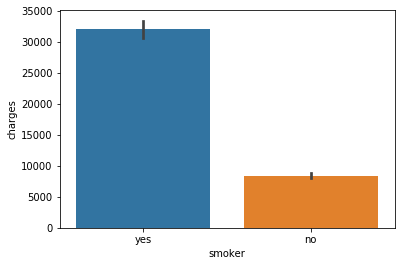

In [147]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [203]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [204]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [205]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,0
6,46,female,33.440,1,no,southeast,8240.58960,0
7,37,female,27.740,3,no,northwest,7281.50560,0
8,37,male,29.830,2,no,northeast,6406.41070,0
9,60,female,25.840,0,no,northwest,28923.13692,0


We can now use the smoker_df column for linear regression.

$𝑐ℎ𝑎𝑟𝑔𝑒𝑠=𝑤1×𝑎𝑔𝑒+𝑤2×𝑏𝑚𝑖+𝑤3×𝑐ℎ𝑖𝑙𝑑𝑟𝑒𝑛+𝑤4×𝑠𝑚𝑜𝑘𝑒𝑟+𝑏$

In [152]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188076


The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.

Let's try adding the "sex" column as well.

$𝑐ℎ𝑎𝑟𝑔𝑒𝑠=𝑤1×𝑎𝑔𝑒+𝑤2×𝑏𝑚𝑖+𝑤3×𝑐ℎ𝑖𝑙𝑑𝑟𝑒𝑛+𝑤4×𝑠𝑚𝑜𝑘𝑒𝑟+𝑤5×𝑠𝑒𝑥+𝑏$

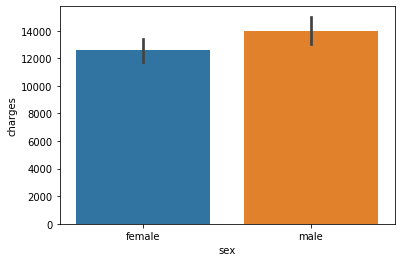

In [206]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [222]:
sex_codes = {'female': 0, 'male': 1}

In [224]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
5,31,female,25.740,0,no,southeast,3756.62160,0,0
6,46,female,33.440,1,no,southeast,8240.58960,0,0
7,37,female,27.740,3,no,northwest,7281.50560,0,0
8,37,male,29.830,2,no,northeast,6406.41070,0,1
9,60,female,25.840,0,no,northwest,28923.13692,0,0


In [216]:
medical_df.charges.corr(medical_df.sex_code)

0.0572920622020254

In [209]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754538


As you might expect, this does have a significant impact on the loss.

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

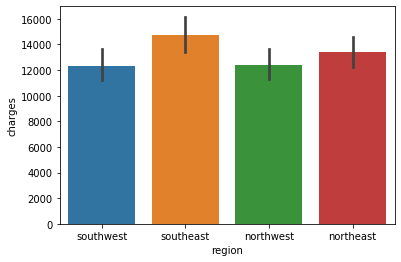

In [225]:
sns.barplot(data=medical_df, x='region', y='charges');

In [233]:
region_code = {'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4}

In [234]:
medical_df['region_code'] = medical_df.region.map(region_code)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,4
1,18,male,33.770,1,no,southeast,1725.55230,0,1,3
2,28,male,33.000,3,no,southeast,4449.46200,0,1,3
3,33,male,22.705,0,no,northwest,21984.47061,0,1,2
4,32,male,28.880,0,no,northwest,3866.85520,0,1,2
5,31,female,25.740,0,no,southeast,3756.62160,0,0,3
6,46,female,33.440,1,no,southeast,8240.58960,0,0,3
7,37,female,27.740,3,no,northwest,7281.50560,0,0,2
8,37,male,29.830,2,no,northeast,6406.41070,0,1,1
9,60,female,25.840,0,no,northwest,28923.13692,0,0,2


In [236]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'region_code']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6043.811701706329


Once again, this leads to a fairly small reduction in the loss.


## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [237]:
model.coef_

array([  257.28807486,   332.57013224,   479.36939355, 23820.43412267,
        -131.11057962,  -353.64001656])

In [238]:
model.intercept_

-11461.81230467253

In [239]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,257.288075
1,bmi,332.570132
2,children,479.369394
3,smoker_code,23820.434123
4,sex_code,-131.110580
5,region_code,-353.640017
6,1,-11461.812305


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [240]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,4
1,18,male,33.770,1,no,southeast,1725.55230,0,1,3
2,28,male,33.000,3,no,southeast,4449.46200,0,1,3
3,33,male,22.705,0,no,northwest,21984.47061,0,1,2
4,32,male,28.880,0,no,northwest,3866.85520,0,1,2
5,31,female,25.740,0,no,southeast,3756.62160,0,0,3
6,46,female,33.440,1,no,southeast,8240.58960,0,0,3
7,37,female,27.740,3,no,northwest,7281.50560,0,0,2
8,37,male,29.830,2,no,northeast,6406.41070,0,1,1
9,60,female,25.840,0,no,northwest,28923.13692,0,0,2


In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

F:\Ace\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



StandardScaler(copy=True, with_mean=True, with_std=True)

In [244]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [245]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [247]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

F:\Ace\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [248]:
cat_cols = ['smoker_code', 'sex_code', 'region_code']
categorical_data = medical_df[cat_cols].values

In [249]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6043.811701706329


In [ ]:
We can now compare the weights in the formula:

𝑐ℎ𝑎𝑟𝑔𝑒𝑠=𝑤1×𝑎𝑔𝑒+𝑤2×𝑏𝑚𝑖+𝑤3×𝑐ℎ𝑖𝑙𝑑𝑟𝑒𝑛+𝑤4×𝑠𝑚𝑜𝑘𝑒𝑟+𝑤5×𝑠𝑒𝑥+𝑤6×𝑟𝑒𝑔𝑖𝑜𝑛+𝑏

In [250]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23820.434123
6,1,9348.287809
0,age,3613.536151
1,bmi,2027.316811
2,children,577.660335
4,sex_code,-131.110580
5,region_code,-353.640017


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI

### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [253]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5264.976941477853


In [254]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6125.865618419018
